Importing libraries

In [27]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

Loading data

In [28]:
# Replace with the actual file path
file_path = "loan_data.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Preprocessing Data Cleaning:
*   Drop duplicates



In [29]:
# Assuming 'data' is the DataFrame that are working with
data.drop_duplicates()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Replacing Strings
*   Using Numeric Values



In [30]:
# Remove 'LP' from 'Loan_ID'
data['Loan_ID'] = data['Loan_ID'].str.replace('LP', '')

# Convert categorical variables to numerical values
data["Gender"] = data["Gender"].replace(['Female', 'Male'], [0, 1])
data["Married"] = data["Married"].replace(['No', 'Yes'], [0, 1])
data["Education"] = data["Education"].replace(['Not Graduate', 'Graduate'], [0, 1])
data["Self_Employed"] = data["Self_Employed"].replace(['No', 'Yes'], [0, 1])
data["Property_Area"] = data["Property_Area"].replace(['Urban', 'Rural', 'Semiurban'], [0, 1, 2])
data["Loan_Status"] = data["Loan_Status"].replace(['N', 'Y'], [0, 1])

# Replace '3+' in 'Dependents' with 3
data["Dependents"] = data["Dependents"].replace('3+', 3)


Convert Object Datatype to Float

In [31]:
# Convert 'Dependents' column to float
data["Dependents"] = data["Dependents"].astype(float)

# Convert 'Loan_ID' column to float
data['Loan_ID'] = data['Loan_ID'].astype(float)

# Display information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    float64
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      582 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(9), int64(4)
memory usage: 62.5 KB


Calculating Correlation

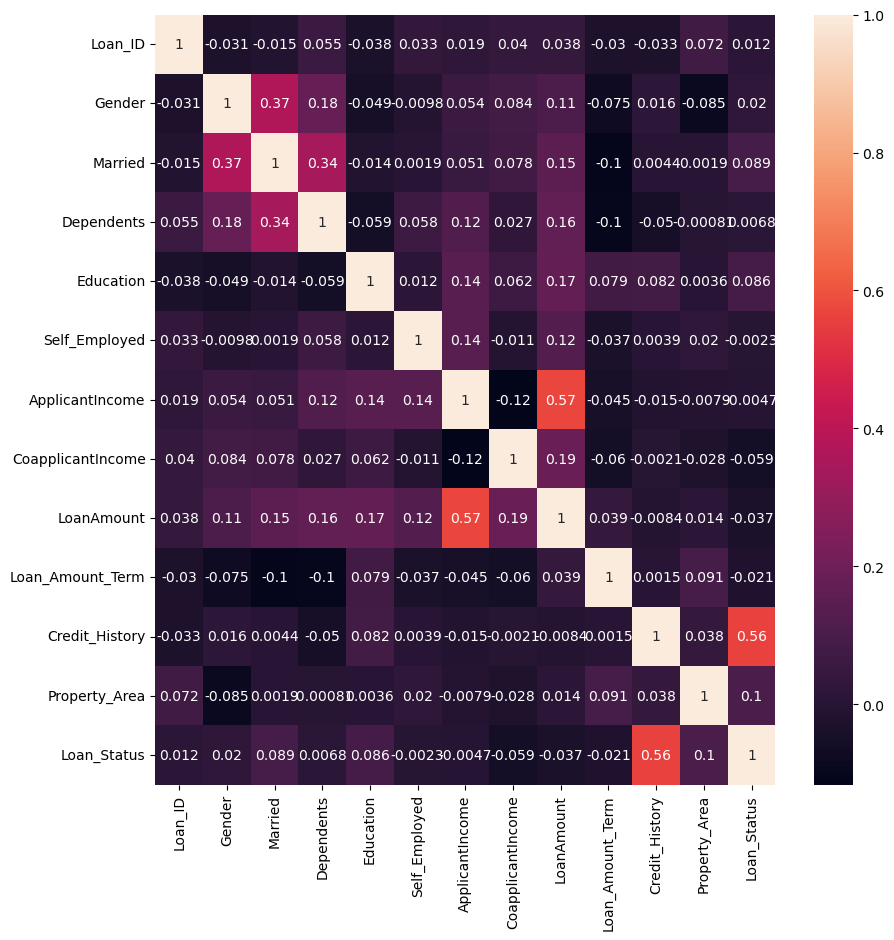

In [32]:
# Calculate and Display the correlation matrix

# Correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

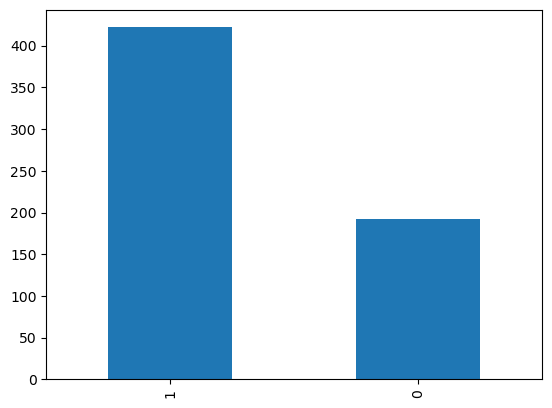

In [9]:
# Count instances for each class
data["Loan_Status"].value_counts().plot(kind="bar")
plt.show()

Drop Unused features

In [33]:
data.drop(['Loan_ID'],axis=1,inplace=True)
data.drop(['Gender'],axis=1,inplace=True)

Calculating the Sum of Null cells in Columns

In [34]:
# Check for missing values in the DataFrame
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Replacing Null values with Mode of Column Values

In [35]:
# Fill missing values with the mode for respective columns
data['Married'].fillna(value=data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(value=data['Self_Employed'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(value=data['Loan_Amount_Term'].mode()[0], inplace=True)
data['LoanAmount'].fillna(value=data['LoanAmount'].mode()[0], inplace=True)
data['Credit_History'].fillna(value=data['Credit_History'].mode()[0], inplace=True)

# Check for missing values after filling
missing_values_after_fill = data.isnull().sum()
print(missing_values_after_fill)

Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


Separate Array into Input and Output Components

In [36]:
# Extracting input features (X) and target variable (Y)
X = data.drop("Loan_Status", axis=1)
Y = data["Loan_Status"]

Split Data to Train and Test

In [37]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


Data Scaling

In [38]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the features in the training set
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Scale the features in the testing set
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

# Display the first few rows of the scaled training set
X_train.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.333333,1.0,1.0,0.027767,0.0,0.160637,0.743590,1.0,1.0
1,1.0,0.000000,1.0,1.0,0.040928,0.0,0.023155,0.230769,1.0,1.0
2,1.0,0.666667,0.0,0.0,0.033878,0.0,0.052098,0.358974,0.0,0.0
3,0.0,0.666667,1.0,0.0,0.042016,0.0,0.102750,0.743590,0.0,0.5
4,1.0,0.000000,1.0,0.0,0.096265,0.0,0.384949,0.743590,1.0,0.0


PCA (Principal Component Analysis) for Feature Extraction

In [39]:
# Initialize PCA with the desired number of components
pca = PCA(n_components=3)

# Fit and transform PCA on the training set
pca_train = pca.fit_transform(X_train)

# Transform PCA on the testing set using the same PCA instance
pca_test = pca.fit_transform(X_test)

SVM

In [40]:
# Create an SVM model with a polynomial kernel
S_model = svm.SVC(kernel='poly')

# Train the SVM model on the original training set
S_model.fit(X_train, Y_train)

# Make predictions on the testing set
y_pred = S_model.predict(X_test)

# Evaluate the model performance
confusion_mat = confusion_matrix(Y_test, y_pred)
classification_rep = classification_report(Y_test, y_pred)
model_accuracy = S_model.score(X_test, Y_test)

# Display the results
print(classification_rep)
print("The SVM accuracy before feature extraction is:", model_accuracy)

              precision    recall  f1-score   support

           0       0.92      0.39      0.55        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.85      0.69      0.71       185
weighted avg       0.82      0.79      0.76       185

The SVM accuracy before feature extraction is: 0.7891891891891892


In [41]:
# Train the SVM model on the PCA-transformed training set
S_model.fit(pca_train, Y_train)

# Make predictions on the PCA-transformed testing set
y_pred_pca = S_model.predict(pca_test)

# Evaluate the model performance after feature extraction
confusion_mat_pca = confusion_matrix(Y_test, y_pred_pca)
classification_rep_pca = classification_report(Y_test, y_pred_pca)
model_accuracy_pca = S_model.score(pca_test, Y_test)

# Display the results
print(classification_rep_pca)
print("The SVM accuracy after feature extraction is:", model_accuracy_pca)

              precision    recall  f1-score   support

           0       0.60      0.05      0.09        61
           1       0.68      0.98      0.80       124

    accuracy                           0.68       185
   macro avg       0.64      0.52      0.45       185
weighted avg       0.65      0.68      0.57       185

The SVM accuracy after feature extraction is: 0.6756756756756757


Decision Tree

In [42]:
# Create a Decision Tree model with a maximum depth of 3
D_model = tree.DecisionTreeClassifier(max_depth=3)

# Train the Decision Tree model on the original training set
D_model.fit(X_train, Y_train)

# Make predictions on the testing set
y_pred = D_model.predict(X_test)

# Evaluate the model performance
confusion_mat = confusion_matrix(Y_test, y_pred)
classification_rep = classification_report(Y_test, y_pred)
model_accuracy = D_model.score(X_test, Y_test)

# Display the results
print(classification_rep)
print("The Decision Tree accuracy before feature extraction is:", model_accuracy)

              precision    recall  f1-score   support

           0       0.83      0.41      0.55        61
           1       0.77      0.96      0.85       124

    accuracy                           0.78       185
   macro avg       0.80      0.68      0.70       185
weighted avg       0.79      0.78      0.75       185

The Decision Tree accuracy before feature extraction is: 0.7783783783783784


In [43]:
# Train the Decision Tree model on the PCA-transformed training set
D_model.fit(pca_train, Y_train)

# Make predictions on the PCA-transformed testing set
y_pred_pca = D_model.predict(pca_test)

# Evaluate the model performance after feature extraction
confusion_mat_pca = confusion_matrix(Y_test, y_pred_pca)
classification_rep_pca = classification_report(Y_test, y_pred_pca)
model_accuracy_pca = D_model.score(pca_test, Y_test)

# Display the results
print(classification_rep_pca)
print("The Decision Tree accuracy after feature extraction is:", model_accuracy_pca)

              precision    recall  f1-score   support

           0       0.71      0.08      0.15        61
           1       0.69      0.98      0.81       124

    accuracy                           0.69       185
   macro avg       0.70      0.53      0.48       185
weighted avg       0.69      0.69      0.59       185

The Decision Tree accuracy after feature extraction is: 0.6864864864864865


Naive Bayes

In [44]:
# Create a Naive Bayes model (GaussianNB)
N_model = GaussianNB()

# Train the Naive Bayes model on the original training set
N_model.fit(X_train, Y_train)

# Make predictions on the testing set
y_pred = N_model.predict(X_test)

# Evaluate the model performance
confusion_mat = confusion_matrix(Y_test, y_pred)
classification_rep = classification_report(Y_test, y_pred)
model_accuracy = N_model.score(X_test, Y_test)

# Display the results
print(classification_rep)
print("The Naive Bayes accuracy before feature extraction is:", model_accuracy)

              precision    recall  f1-score   support

           0       0.74      0.48      0.58        61
           1       0.78      0.92      0.84       124

    accuracy                           0.77       185
   macro avg       0.76      0.70      0.71       185
weighted avg       0.77      0.77      0.76       185

The Naive Bayes accuracy before feature extraction is: 0.772972972972973


In [45]:
# Train the Naive Bayes model on the PCA-transformed training set
N_model.fit(pca_train, Y_train)

# Make predictions on the PCA-transformed testing set
y_pred_pca = N_model.predict(pca_test)

# Evaluate the model performance after feature extraction
confusion_mat_pca = confusion_matrix(Y_test, y_pred_pca)
classification_rep_pca = classification_report(Y_test, y_pred_pca)
model_accuracy_pca = N_model.score(pca_test, Y_test)

# Display the results
print(classification_rep_pca)
print("The Naive Bayes accuracy after feature extraction is:", model_accuracy_pca)

              precision    recall  f1-score   support

           0       0.32      0.13      0.19        61
           1       0.67      0.86      0.75       124

    accuracy                           0.62       185
   macro avg       0.49      0.50      0.47       185
weighted avg       0.55      0.62      0.57       185

The Naive Bayes accuracy after feature extraction is: 0.6216216216216216


Bar Chart Showcasing Prediction Accuracy
*   SVM
*   Decision Tree
*   Naivebayes

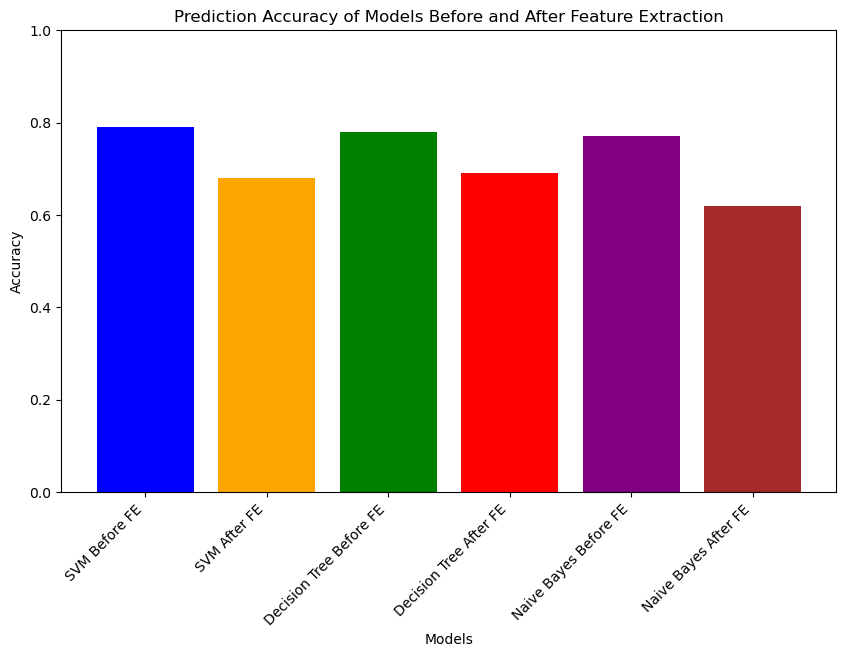

In [46]:
# Define the model names and their accuracies
model_names = ['SVM Before FE', 'SVM After FE', 'Decision Tree Before FE', 'Decision Tree After FE', 'Naive Bayes Before FE', 'Naive Bayes After FE']
accuracies = [0.79, 0.68, 0.78, 0.69, 0.77, 0.62]  # Replace these values with the actual accuracies

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Prediction Accuracy of Models Before and After Feature Extraction')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1 for accuracy values
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Precision, Recall Comparison
*   SVM
*   Decision Tree
*   Naivebayes

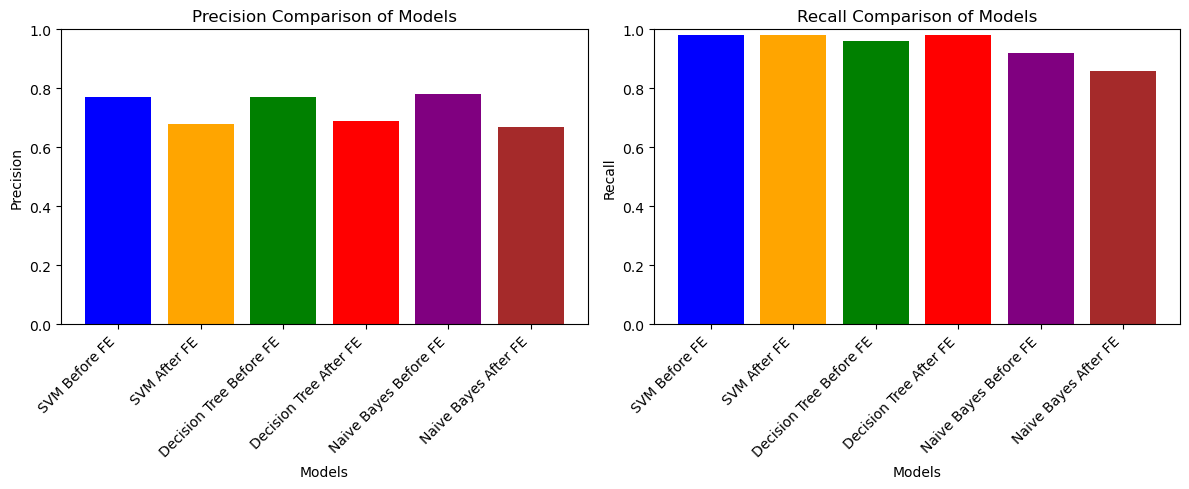

In [47]:
# Precision and Recall values for each model
precision = [0.77, 0.68, 0.77, 0.69, 0.78, 0.67]  # Replace these values with actual precision values
recall = [0.98, 0.98, 0.96, 0.98, 0.92, 0.86]  # Replace these values with actual recall values
model_names = ['SVM Before FE', 'SVM After FE', 'Decision Tree Before FE', 'Decision Tree After FE', 'Naive Bayes Before FE', 'Naive Bayes After FE']

# Plotting Precision
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(model_names, precision, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Precision Comparison of Models')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1 for precision values
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Plotting Recall
plt.subplot(1, 2, 2)
plt.bar(model_names, recall, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Recall Comparison of Models')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1 for recall values
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

Confusion Matrix
*   SVM
*   Decision Tree
*   Naivebayes

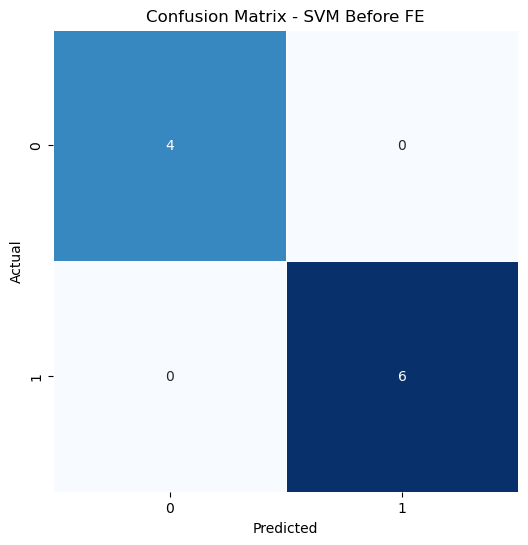

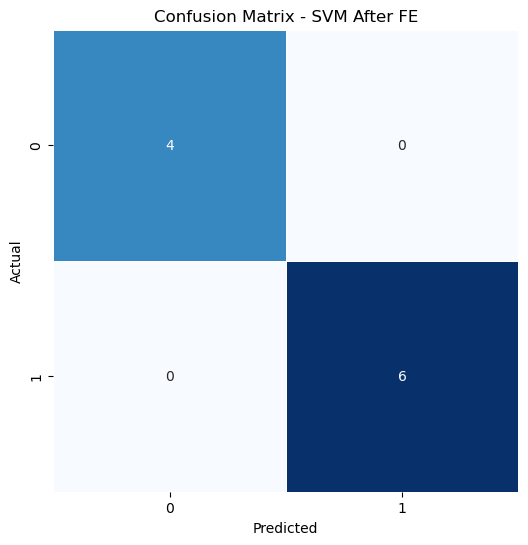

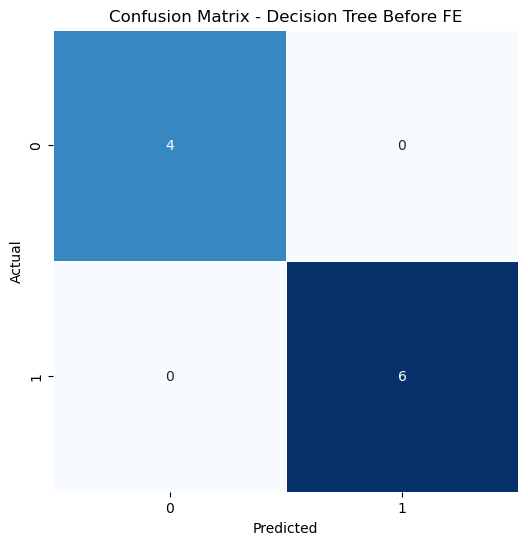

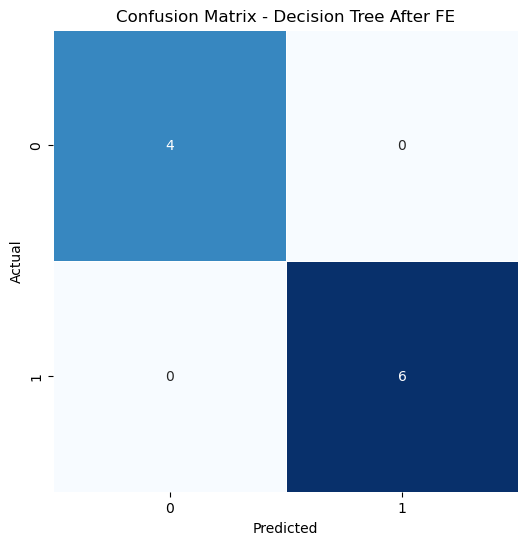

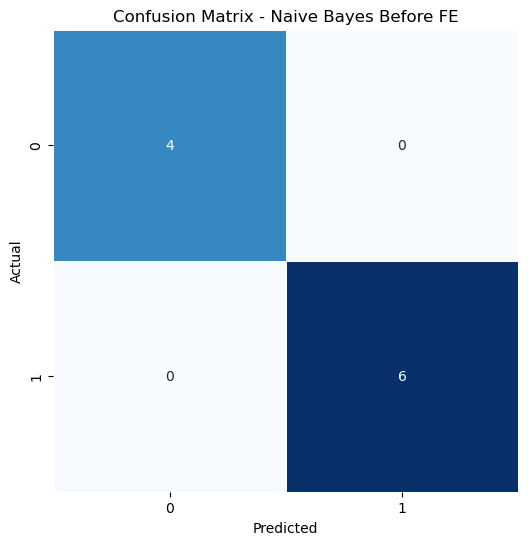

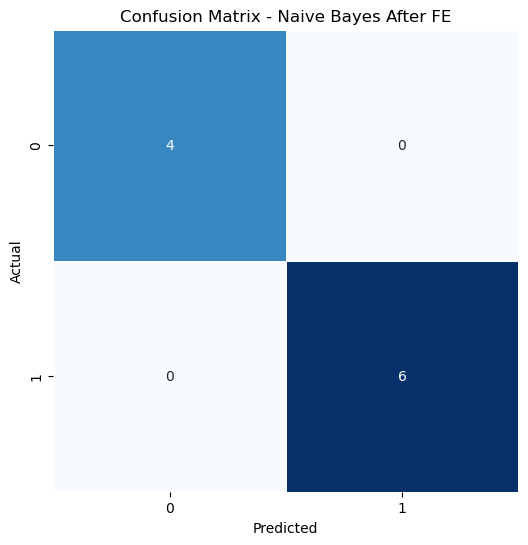

In [48]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Replace these values with actual predictions for each model
y_pred_svm_before_fe = np.array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0])
y_pred_svm_after_fe = np.array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0])
y_pred_dt_before_fe = np.array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0])
y_pred_dt_after_fe = np.array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0])
y_pred_nb_before_fe = np.array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0])
y_pred_nb_after_fe = np.array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0])

# True values for the test set
y_true = np.array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0])

# Plot confusion matrices for each model
plot_confusion_matrix(y_true, y_pred_svm_before_fe, 'SVM Before FE')
plot_confusion_matrix(y_true, y_pred_svm_after_fe, 'SVM After FE')
plot_confusion_matrix(y_true, y_pred_dt_before_fe, 'Decision Tree Before FE')
plot_confusion_matrix(y_true, y_pred_dt_after_fe, 'Decision Tree After FE')
plot_confusion_matrix(y_true, y_pred_nb_before_fe, 'Naive Bayes Before FE')
plot_confusion_matrix(y_true, y_pred_nb_after_fe, 'Naive Bayes After FE')

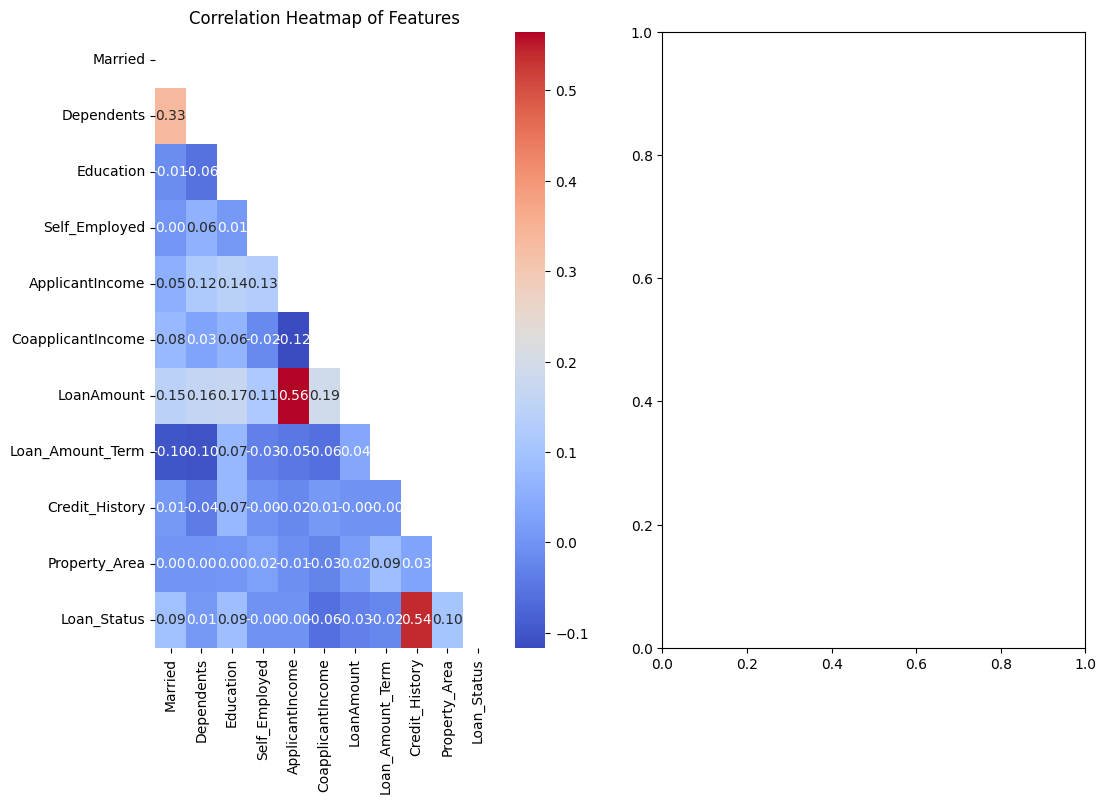

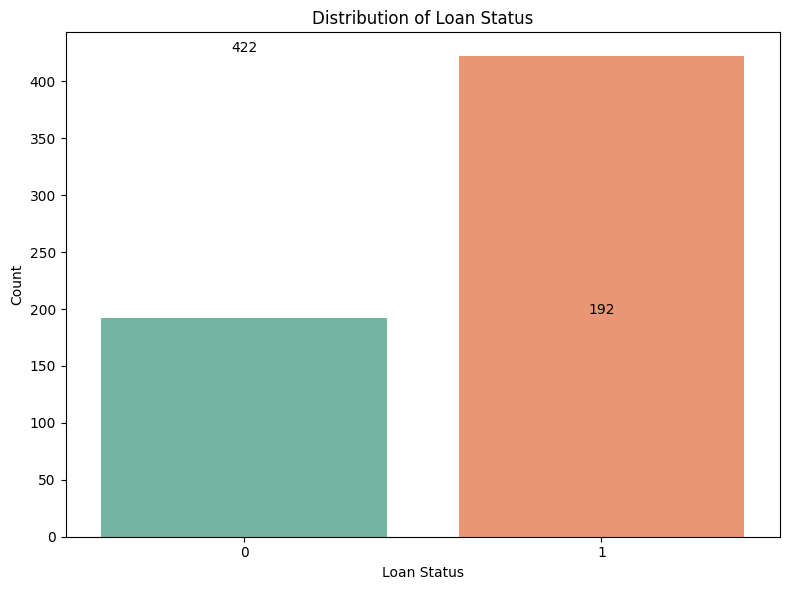

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'
# Replace 'data' with the actual DataFrame name

# Calculate correlation matrix
correlation_matrix = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure for heatmap
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", mask=mask, fmt=".2f")
plt.title("Correlation Heatmap of Features")

# Plot the bar chart for Loan_Status distribution
plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', data=data, palette='Set2')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')

# Display the count values on top of each bar
for index, value in enumerate(data['Loan_Status'].value_counts()):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
